# Intro to Gradient Descent

by [Evan Gonzalez](https://www.linkedin.com/in/evan-gonzalez)

>[Intro to Gradient Descent](#scrollTo=slI_gGwhHzn9)

>[Code of Conduct](#scrollTo=LrRP6uvB4x-Q)

>[Goals](#scrollTo=V7k_q8f9BSJh)

>>[Disclaimer](#scrollTo=V7k_q8f9BSJh)

>[What is Gradient Descent?](#scrollTo=Ind7A1yZy6eS)

>[Gradient Descent Algorithm](#scrollTo=say32O1HEO-v)

>>[Cost Function](#scrollTo=say32O1HEO-v)

>>[Gradient Descent](#scrollTo=say32O1HEO-v)

>>[Learning Rate](#scrollTo=say32O1HEO-v)

>[Our First Gradient Descent](#scrollTo=TjR_MtovGmpW)

>>[Problem 1](#scrollTo=c6FNzl9ohsSI)

>[Revisiting Linear Regression with the Iris Dataset](#scrollTo=rWhmsxRWfL1T)

>>[Minimizing the least squares cost function with Gradient Descent](#scrollTo=LycryO3j8MD8)

>>[Different Types of Stochastic Gradient Descent](#scrollTo=uXc25RPKVsmu)

>>>[Batch Gradient Descent](#scrollTo=uXc25RPKVsmu)

>>>[Stochastic Gradient Descent](#scrollTo=uXc25RPKVsmu)

>>>[Mini-Batch Gradient Descent](#scrollTo=uXc25RPKVsmu)

>>[Problem 2](#scrollTo=rTcJde_hJibr)

>[Exploring SGD Classifiers](#scrollTo=lIW5p0QC7FrY)

>[Provide Feedback Here](#scrollTo=furgzzFfIFRD)



#[Code of Conduct](https://docs.google.com/presentation/d/1UiBbQLGCZ_8VTTufJGitjnfz2Lj12TzAPuvHLvRLMhk/edit?usp=drive_link)

# Goals

1.   Learn how Gradient Descent can be used for maximizing/minimizing functions.
2.   Implement different variations of the Gradient Descent algorithm.
3.   Use scikit-learn to gain experience with SGD classifiers.

## Disclaimer

This is the first time I've ever taught this content. I am not an expert in machine learning. I am not going deep into the math here (for that, check out [Andrew Ng's free course on Cousera](https://www.coursera.org/specializations/machine-learning-introduction?utm_medium=sem&utm_source=gg&utm_campaign=B2C_NAMER_machine-learning-introduction_stanford_FTCOF_specializations_country-US-country-CA&campaignid=685340575&adgroupid=46849728719&device=c&keyword=andrew%20ng%20machine%20learning&matchtype=b&network=g&devicemodel=&adposition=&creativeid=606098666387&hide_mobile_promo&gad_source=1&gclid=CjwKCAjwrvyxBhAbEiwAEg_Kgl91iB1DOf9b0839DxmjpcbMnlPTNuOqtIA2kPillczGkLBxtV3A7RoCPqoQAvD_BwE)). I am here to teach you the shortcut through scikitlearn. We will skip a lot of key concepts here so I would think of this as an introduction to machine learning concepts. Seek out other courses!




# What is Gradient Descent?

Gradient descent is an iterative first-order optimization algorithm, used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning (DL) to minimize a cost/loss function (e.g. in a linear regression). Due to its importance and ease of implementation, this algorithm is usually taught at the beginning of almost all machine learning courses.

However, its use is not limited to ML/DL only, it's widely used also in areas like:

*   control engineering (robotics, chemical, etc.)
*   computer games
*   mechanical engineering

This method was proposed long before the era of modern computers by Augustin-Louis Cauchy in 1847. Since that time, there was an significant development in computer science and numerical methods. That led to numerous improved versions of Gradient Descent. However, in this article we're going to use a basic/vanilla version implemented in Python.

# Gradient Descent Algorithm

In gradient descent, we are looking to find local minima and local maxima of some differentiable and convex function. We do this by minimizing the mean squared error between some predicted value where the min/max occurs, and the actual value (evaluated from data or an analytical function). This function that we are trying to minimze is called the cost function, $J$.

## Cost Function

The cost (or loss) function measures the difference, or error, between actual $y$ and predicted $y$ (often called our hypothesis, $h(x)$ at its current position. This improves the machine learning model's efficacy by providing feedback to the model so that it can adjust the parameters to minimize the error and find the local or global minimum. It continuously iterates, moving along the direction of steepest descent (or the negative gradient) until the cost function is close to or at zero. At this point, the model will stop learning. Additionally, while the terms, cost function and loss function, are considered synonymous, there is a slight difference between them. It’s worth noting that a loss function refers to the error of one training example, while a cost function calculates the average error across an entire training set.

\begin{equation}
J(x) = \frac{1}{m} \sum_{i=1}^{m}{\lbrack \underbrace{h(x_i)}_{\textrm{predicted} \\ \textrm{value}} - \underbrace{y_i}_{\textrm{true} \\ \textrm{value}} \rbrack^2}
\end{equation}

## Gradient Descent

The main mathematical concept behind gradient descent is in the name. We will follow the gradient of our cost function by updating our hypothesis as

\begin{equation}
x := x \pm \alpha \frac{\partial}{\partial x} J(x)
\end{equation}

where $\alpha$ is the learning rate, or how quickly we want to descend down the gradient. To find a maximum, we use the plus variant of the above equation. To find a minimum, we use the minus variant of the above equation. As we approach the local min/max, the gradient ($\frac{\partial}{\partial x} J(x)$) will approach zero, and the algorithm should converge.

## Learning Rate

The learning rate (also referred to as step size or the alpha) is the size of the steps that are taken to reach the minimum/maximum. This is typically a small value, and it is evaluated and updated based on the behavior of the cost function. High learning rates result in larger steps but risks overshooting the minimum. Conversely, a low learning rate has small step sizes. While it has the advantage of more precision, the number of iterations compromises overall efficiency as this takes more time and computations to reach the minimum.

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline

# Our First Gradient Descent

Let's start without noisy data. Let's use the gradient descent algorithm to find the minima of differentiable analytical functions.

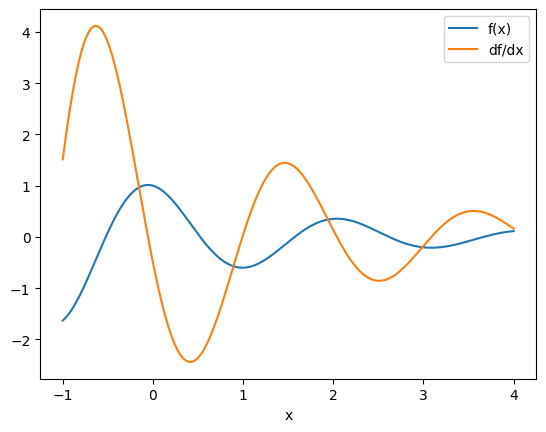

In [58]:
f = lambda x: np.cos(3*x) * np.exp(-0.5*x)
df = lambda x: np.exp(-0.5*x) * (-0.5*np.cos(3*x) - 3*np.sin(3*x))
x = np.linspace(-1,4,1000)

#Plot the curve
plt.plot(x, f(x), label='f(x)')
plt.plot(x, df(x), label='df/dx')
plt.xlabel('x')
plt.legend()
plt.show()

Let's take a look at how we can implement the gradient descent algorithm:

In [59]:
def plot_gradient(x, y, x_vis, y_vis):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

    ax1.scatter(x_vis, y_vis, c = "b") # plot the steps
    ax1.plot(x, f(x), c = "r") # plot the function
    ax1.set_title("Gradient Descent")

    ax2.scatter(x_vis, y_vis, c = "b") # plot the steps
    ax2.plot(x,f(x), c = "r") # plot the function
    ax2.set_xlim([0.5,1.5])
    ax2.set_title("Zoomed Gradient Descent")
    plt.show()

def gradient_descent(y, dy, xGuess, precision, learning_rate, max_iter=100, ndims=1):
    # record of all guesses
    xGrad = np.copy(xGuess)

    # number of iterations
    iter = 0

    # difference between prediction and truth
    residual = 100

    while iter < max_iter and residual > precision:
        # calculate next guess by subtracting the product of the derivative and the learning rate calculated above from the previous guess
        # since we descend toward minimum, we subtract the derivative
        xGuess = xGuess - learning_rate * dy(xGuess)
        xGrad = np.append(xGrad, xGuess)

        # break loop if our estimate of xGrad stops changing
        residual = np.linalg.norm(xGrad[-1] - xGrad[-2])
        iter += 1

    xGrad = xGrad.reshape(iter+1,ndims)
    print ("Number of steps taken: ", len(xGrad)-1)
    return xGrad

First, let's see how many iterations it takes GD to reach the specified precision.

Number of steps taken:  17


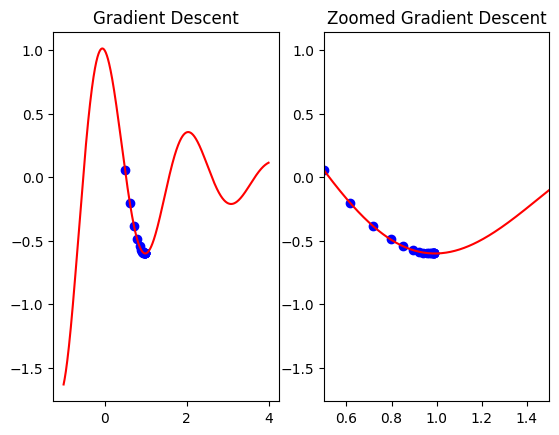

In [60]:
x0 = 0.5
precision = 0.001
learningRate = 0.05
maxIter = 100
xGrad = gradient_descent(f, df, x0, precision, learningRate, maxIter)
plot_gradient(x, f(x), xGrad, f(xGrad))

If I use too small of a learning rate, then it'll take me more iterations to find the minimum.

Number of steps taken:  59


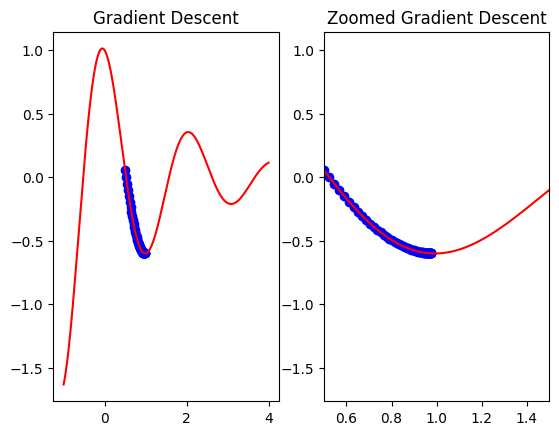

In [61]:
xGrad = gradient_descent(f, df, x0, 0.001, 0.01, 100)
plot_gradient(x, f(x), xGrad, f(xGrad))

The difficult part is finding the right learning rate that gets you to the minimum the quickest.

Number of steps taken:  3


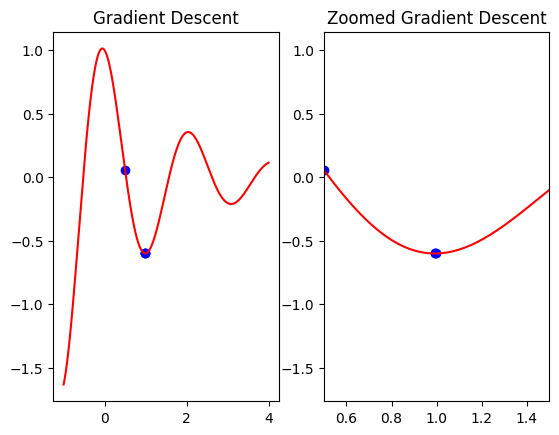

In [62]:
xGrad = gradient_descent(f, df, 0.5, 0.001, 0.21, 100)
plot_gradient(x, f(x), xGrad, f(xGrad))

Here, if I increase the learning rate too much, then I actually overshoot and end up taking two extra iterations to find the minimum.

Number of steps taken:  5


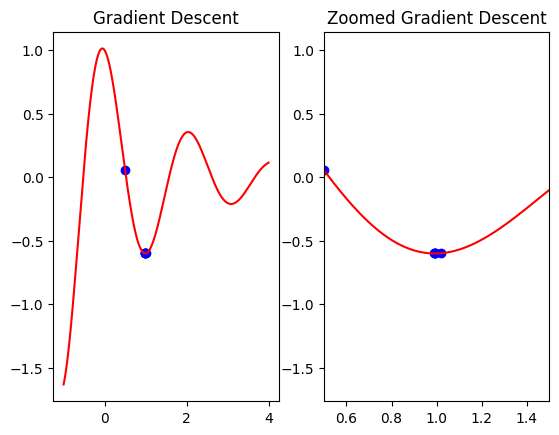

In [63]:
xGrad = gradient_descent(f, df, 0.5, 0.001, 0.22, 100)
plot_gradient(x, f(x), xGrad, f(xGrad))

Number of steps taken:  1000


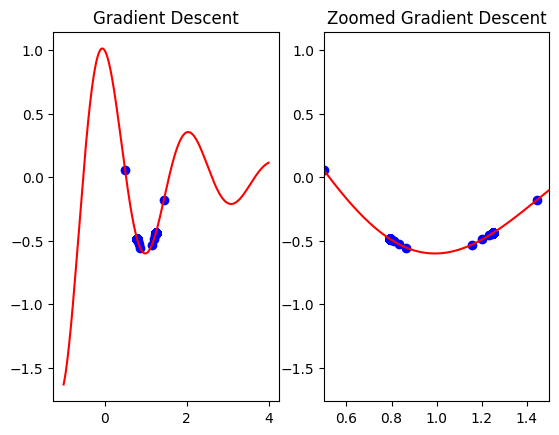

In [64]:
xGrad = gradient_descent(f, df, 0.5, 0.001, 0.4, 1000)
plot_gradient(x, f(x), xGrad, f(xGrad))

If I make the learning rate bigger, we might skip over the first minimum altogether and find the second one.

Number of steps taken:  10


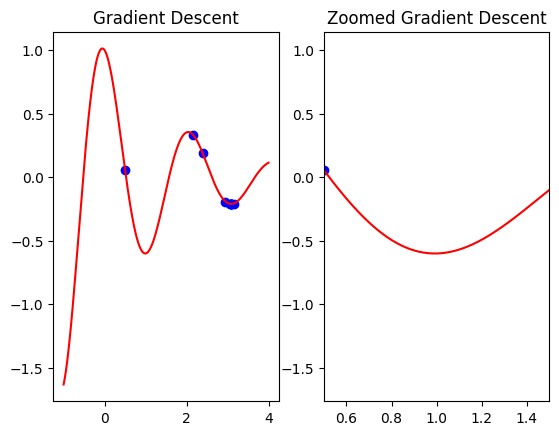

In [65]:
xGrad = gradient_descent(f, df, 0.5, 0.001, 0.7, 100)
plot_gradient(x, f(x), xGrad, f(xGrad))

## Problem 1

Let's try solving gradient descent with a 3D function

\begin{equation}
  z = x^2 + 2y^2 \, .
\end{equation}

This function has the following partial derivatives:
\begin{align}
  \frac{\partial z}{\partial x} &= 2x \\
  \frac{\partial z}{\partial y} &= 4y
\end{align}

We can use our same algorithm to attempt to find the values of $x$ and $y$ that minimize $z$. Just off of intuition, you might be able to tell the the minimization occurs at $(x,y) = (0,0)$.

1.  Implement the functions z and dz to return the equations above.
2.  Start your algorithm with the initial guess, $(x,y) = (4,3)$.
3.  Make sure to specify `ndims=2` when calling your `gradient_descent()` function.
4.  Call your output variable from the `gradient_descent()` function, `guesses`

Number of steps taken:  79


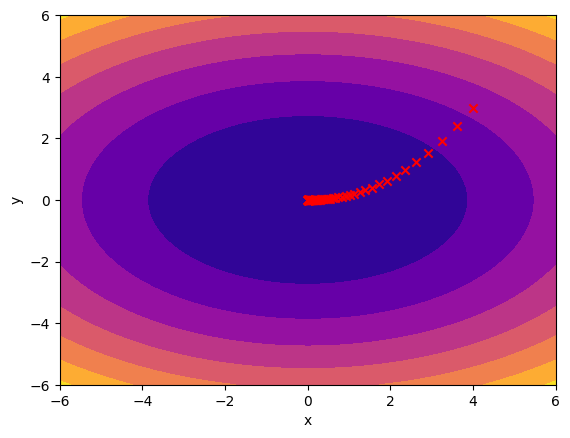

In [66]:
X = np.array([4, 3])

# define z and gradient of z
def z(X):
    # X is numpy array where X[0] = x and X[1] = y
    z = X[0] ** 2 + 2 * X[1] ** 2
    return z

def dz(X):
    dzdx = 2 * X[0]
    dzdy = 4 * X[1]
    return np.array([dzdx, dzdy])

# initialize parameters
x0 = np.array([4, 3])

# compute the gradient descent algorithm
guesses = gradient_descent(z, dz, x0, precision, learningRate, maxIter, ndims=2)

# Generate the x and y grid for plotting purposes
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X, Y = np.meshgrid(x,y)

# plot the function and gradient descent
plt.contourf(X,Y,z([X, Y]),cmap='plasma')
plt.scatter(guesses[:,0], guesses[:,1], marker='x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Revisiting Linear Regression with the Iris Dataset


In [67]:
import sklearn
from sklearn import datasets

iris_data, iris_classes = sklearn.datasets.load_iris(return_X_y=True,as_frame=True)
iris_df = pd.DataFrame(iris_data)
iris_df['class'] = iris_classes

iris_dictionary = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df.replace({'class': iris_dictionary}, inplace=True)

display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Recall the linear regression functional form from the last lesson:

\begin{equation}
  y = \beta_0 + \beta_1 x + \epsilon \, .
\end{equation}

Now recall that we solve the linear regression problem by finding the values of $\beta_0$ and $\beta_1$ that minimize the residual of least squares:

\begin{equation}
\underset{\beta_0, \beta_1}{\operatorname{min}}   \sum_{i=1}^n \left\lbrack y_i - (\beta_0 + \beta_1 x_i) \right\rbrack^2.
\end{equation}
To find the minimum, we take the derivative with respect to both $\beta$ variables and set the resulting equations equal to zero. The you can solve the resulting system of equations with two equations and two unknowns. Sparing you some math, the resulting equations are
\begin{equation}
\beta_1 =
\frac{\sum_{i=1}^n {(x_i - \overline{x}) (y_i - \overline{y})}}{\sum_{i=1}^n {(x_i - \overline{x})^2 }} \, ,
\end{equation}
\begin{equation}
\beta_0 = \overline{y} - \beta_1 \overline{x} \, ,
\end{equation}

where the overline quantities denote the mean values. We can write this equation in matrix form as
\begin{equation}
\beta = (X^T X)^{-1} X^T y \, .
\end{equation}

This allows us to generalize for high-dimensional training sets. Let's take a look at how to implement this function in python as opposed to taking the shortcut with python packages.

betas: [-0.34210645  0.40911883]


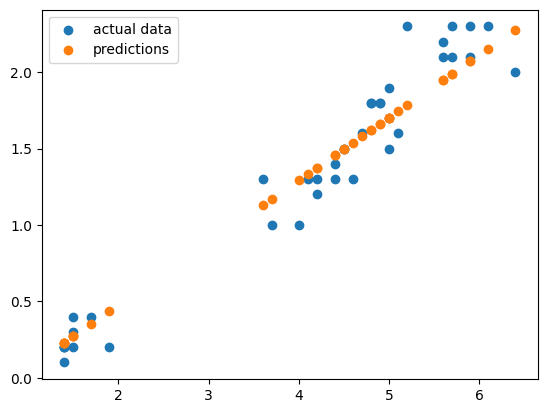

In [68]:
from sklearn.model_selection import train_test_split
import numpy as np

X = iris_df['petal length (cm)'].to_numpy()
y = iris_df['petal width (cm)'].to_numpy()

X = X.reshape(-1,1)
# Add an extra column of ones to our X matrix.
# This allows us to compute the intercept of our regression line.
X = np.concatenate((np.ones((len(X),1)), X), axis=1)
y = y.reshape(-1,1)

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Compute the ordinary least squares minimization via matrix inversion
def minimize_with_inversion(X_train, y_train):
  return np.linalg.solve(np.matmul(X_train.T,X_train),
                         np.matmul(X_train.T,y_train))[:,0]

# Solve the minimization problem with matrix inversion
betas = minimize_with_inversion(X_train, y_train)

# Generate predictions
y_pred = np.matmul(betas,X_test.T)

print('betas:', betas)

plt.scatter(X_test[:,1], y_test, label='actual data')
plt.scatter(X_test[:,1], y_pred, label='predictions')
plt.legend()
plt.show()

## Minimizing the least squares cost function with Gradient Descent

Now let's take a look at solving the sample problem with gradient descent to minimize our cost function:

\begin{equation}
J(\beta_0, \beta_1) = \frac{1}{2m} \sum_{i=1}^{m}{\lbrack \underbrace{h_{\beta}(x_i)}_{\textrm{predicted} \\ \textrm{value}} - \underbrace{y_i}_{\textrm{true} \\ \textrm{value}} \rbrack^2}
\end{equation}

The gradient descent update is now written as

\begin{equation}
\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta_0, \beta_1) \, ,
\end{equation}

where $j \in \{ 0, 1 \}$.

Stepping through the substitutions and simplifying algebra gives the updated values of $\beta$ that will minimze our cost function.

\begin{align}
\frac{\partial}{\partial \beta} J_{\beta}
&= \frac{\partial}{\partial \beta} \frac{1}{2m} \sum_{i=1}^{m}{\lbrack h_{\beta}(x_i) - y_i \rbrack^2} \\
&= \frac{1}{m} \sum_{i=1}^{m}{\lbrack h_{\beta}(x_i) - y_i \rbrack \frac{\partial}{\partial \beta_j} (\beta x_i - y_i)} \\
&= \frac{1}{m} (h_{\beta}(x_i) - y_i) x_i
\end{align}

\begin{equation}
\beta_j := \beta_j - \frac{\alpha}{m} \sum_{i=1}^{m}{\lbrack (h_{\beta}(x_i) - y_i) x_i \rbrack}
\end{equation}

In [69]:
from sklearn.utils import shuffle

def gd_update(X, y, betas, learning_rate):
  m = 1 if isinstance(y, float) else len(y)
  return learning_rate / m * np.dot(np.matmul(betas,X.T)- y, X)

def gd_regression(X_train, y_train, learning_rate, max_iter, tolerance):
  betas = np.zeros(np.shape(X_train)[-1])
  i = 0
  residual = 1e6
  while i < max_iter and residual > tolerance:
    update = gd_update(X_train, y_train, betas, learning_rate)
    betas = betas - update
    # calculate the residual so we can check the convergence criteria
    residual = abs(np.sum(update))
    i += 1
  return i, betas

num_iterations: 339
betas: [-0.34144134  0.40897038]


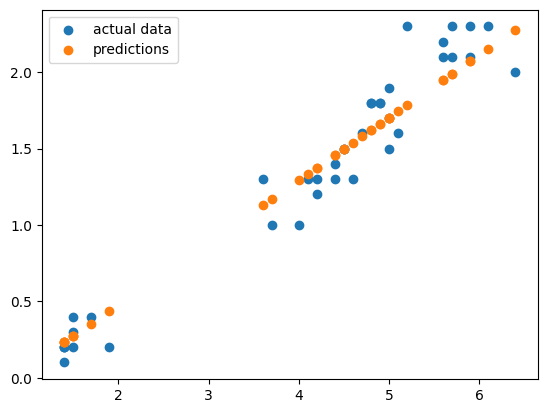

In [70]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

num_iterations, betas_gd = gd_regression(X_train, y_train, 0.1, 500, 1e-5)
y_pred_gd = np.matmul(betas_gd,X_test.T)

print('num_iterations:', num_iterations)
print('betas:', betas_gd)

plt.scatter(X_test[:,1], y_test, label='actual data')
plt.scatter(X_test[:,1], y_pred_gd, label='predictions')
plt.legend()
plt.show()

## Different Types of Gradient Descent

### Batch Gradient Descent

Up until now, we've been using a variant of gradient descent called, "batch gradient descent". In batch gradient descent, we summed the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a ***training epoch***.

While this batching provides computation efficiency, it can still have a long processing time for large training datasets as it still needs to store all of the data into memory. Batch gradient descent also usually produces a stable error gradient and convergence, but sometimes that convergence point isn't the most ideal, finding the local minimum versus the global one.

### Stochastic Gradient Descent

Stochastic gradient descent (SGD) runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time. Since you only need to hold one training example, they are easier to store in memory. While these frequent updates can offer more detail and speed, it can result in losses in computational efficiency when compared to batch gradient descent. Its frequent updates can result in noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one.

### Mini-Batch Gradient Descent

Mini-batch gradient descent combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. This approach strikes a balance between the computational efficiency of batch gradient descent and the speed of stochastic gradient descent.

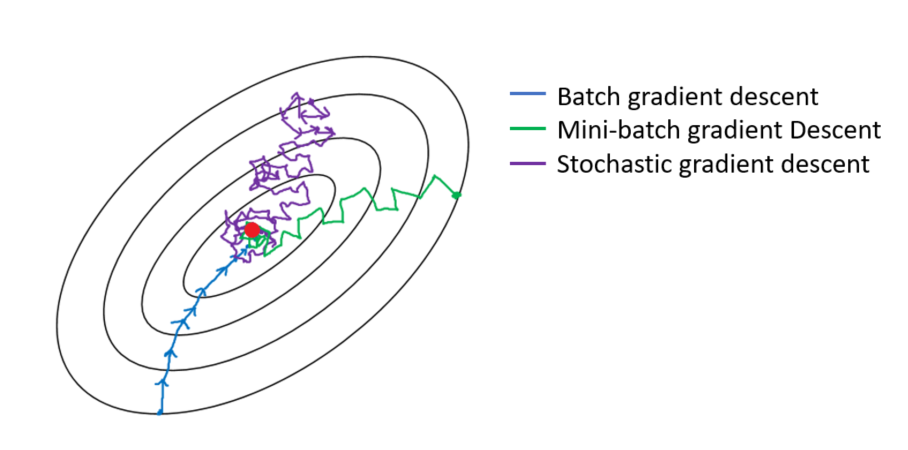

## Problem 2

Modify the `gd_regression` function to perform stochastic and mini-batch gradient descent. You'll need to add a new input argument for the function to specify the mini-batch size.

The stochastic and mini-batch gradient descent algorithms can be implemented with minor tweaks to our `gd_regression` function. At the start of your while loop, you simply need to draw $n$ random samples from your training dataset to send into the `gd_update` function. If you draw only a single sample ($n=1$), then you are using stochastic gradient descent. If you draw more than one random sample, you are using mini-batch gradient descent.

---

***Hint***: You might want to use the `shuffle` function from `sklearn.utils` to draw your random samples. The number of samples is specified with the `n_samples` argument.

***Hint***: You do not need to edit the `gd_update` function.

In [71]:
from sklearn.utils import shuffle

def sgd_regression(X_train, y_train, learning_rate, max_iter, tolerance, batch_size=1):
  betas = np.zeros(np.shape(X_train)[-1])
  i = 0
  residual = 1e6
  while i < max_iter and residual > tolerance:
    X_shuffle, y_shuffle = shuffle(X_train, y_train)
    update = gd_update(X_train, y_train, betas, learning_rate)
    betas = betas - update
    # calculate the residual so we can check the convergence criteria
    residual = abs(np.sum(update))
    i += 1
  return i, betas

Now let's take a look at how the SGD algorithm performs in computing our linear regression $\beta$ values.

num_iterations: 500
betas: [-0.33842598  0.40829735]


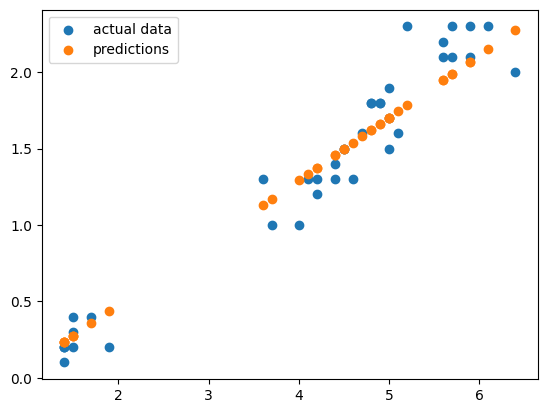

In [72]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

num_iterations, betas_sgd = sgd_regression(X_train, y_train, 0.05, 500, 1e-5, 5)
y_pred_sgd = np.matmul(betas_sgd,X_test.T)

print('num_iterations:', num_iterations)
print('betas:', betas_sgd)

plt.scatter(X_test[:,1], y_test, label='actual data')
plt.scatter(X_test[:,1], y_pred_sgd, label='predictions')
plt.legend()
plt.show()

# Exploring SGD Classifiers

Let's explore how to use SGD classifiers in scikit-learn. Recall that our data points can be colored by their species. Let's see if we can teach a machine learning model to determine the species of iris based on various combinations of our training parameters.

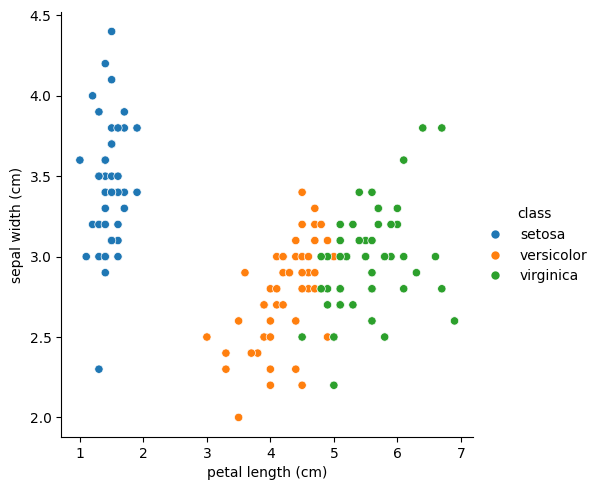

In [73]:
sns.relplot(data=iris_df, x='petal length (cm)', y='sepal width (cm)', hue='class')

Define some plotting functions we'll use to visualize the decision boundaries that the classifier generates.

In [74]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def plot_boundaries(clf, X_data, feature_names, ax):
  DecisionBoundaryDisplay.from_estimator(
      clf,
      X_data,
      cmap=plt.cm.Pastel1,
      ax=ax,
      response_method="predict",
      xlabel=feature_names[0],
      ylabel=feature_names[1])

# Plot the three one-against-all classifiers
def plot_hyperplane(c, color, clf):
  coef = clf.coef_
  intercept = clf.intercept_
  xvals = np.array(plt.xlim())
  yvals = (-(xvals * coef[c, 0]) - intercept[c]) / coef[c, 1]
  plt.plot(xvals, yvals, ls="--", color=color)

def plot_scatter(c, color, X_data, y_data, target_names):
  idx = np.where(y_data == c)
  plt.scatter(X_data[idx, 0],
              X_data[idx, 1],
              c=color,
              label=target_names[c],
              edgecolor="black",
              s=20)

training time: 0.00513005256652832
n_iterations: 37


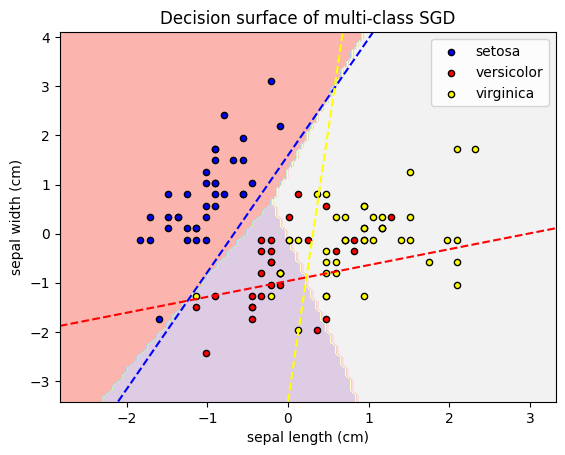

training time: 0.004381656646728516
n_iterations: 29


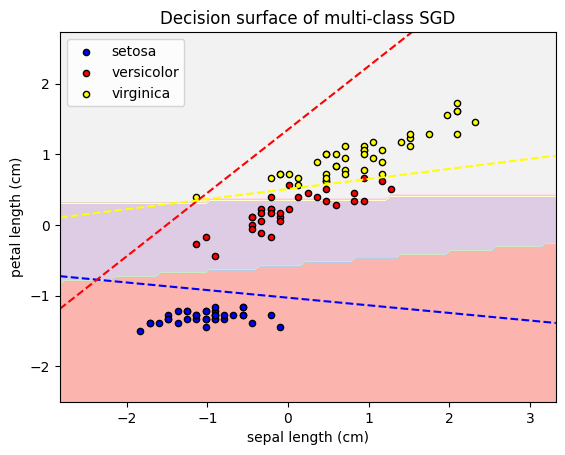

training time: 0.004972696304321289
n_iterations: 29


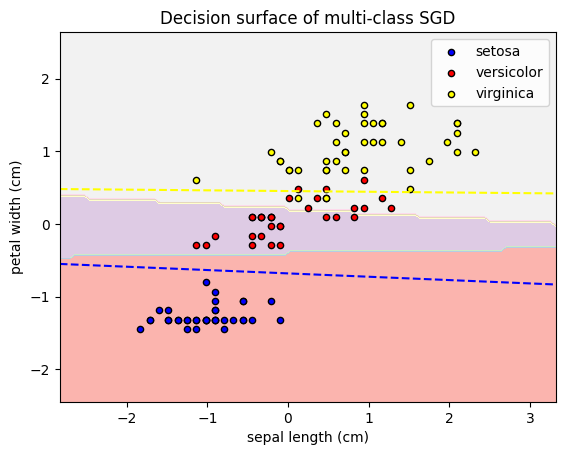

training time: 0.007441282272338867
n_iterations: 30


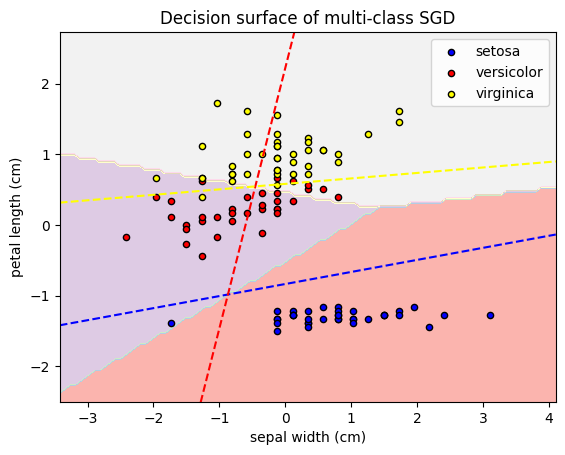

training time: 0.004550933837890625
n_iterations: 22


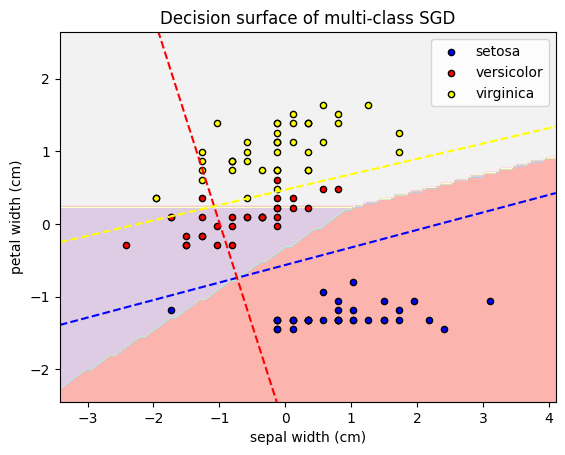

training time: 0.00457763671875
n_iterations: 29


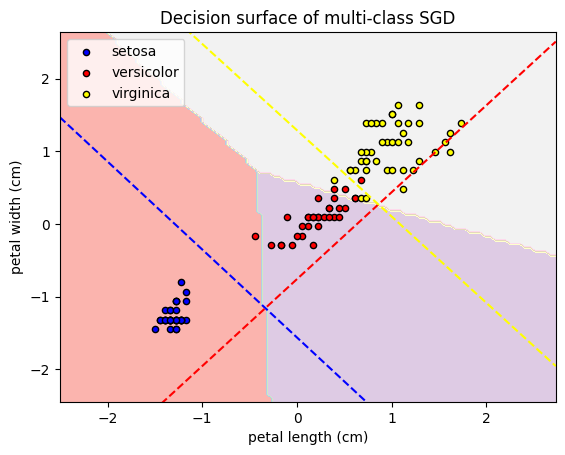

In [75]:
import itertools
import time
all_features = iris_df.columns[:-1]
training_features_combinations = [[a,b] for a, b in itertools.combinations(all_features,2)]

for training_features in training_features_combinations:
  # we only take the first two features. We could
  # avoid this ugly slicing by using a two-dim dataset
  X = iris_df[training_features].to_numpy()
  y = iris_classes.to_numpy()

  # Splitting the Dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

  # standardize the data. i.e., X_train = (X_train - mean) / std
  scaler = StandardScaler().fit(X_train)
  X_train = scaler.transform(X_train)

  # Instantiate the SGDClassifier
  clf = SGDClassifier(alpha=0.001, max_iter=100, random_state=0)
  start_training = time.time()
  clf.fit(X_train, y_train)
  stop_training = time.time()

  y_pred = clf.predict(X_test)

  training_time = stop_training - start_training
  print('training time:',training_time)
  print('n_iterations:', clf.n_iter_)

  colors = ['blue', 'red', 'yellow']
  ax = plt.gca()
  plot_boundaries(clf, X_train, training_features, ax)
  for i, color in zip(clf.classes_, colors):
    plot_scatter(i, color, X_train, y_train, iris_dictionary)
  plt.axis('tight')
  for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color, clf)
  plt.legend()
  plt.title("Decision surface of multi-class SGD")
  plt.show()

# [Provide Feedback Here](https://forms.gle/3NsdcphuBJ7GFPEu5)